In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from netgraph import Graph

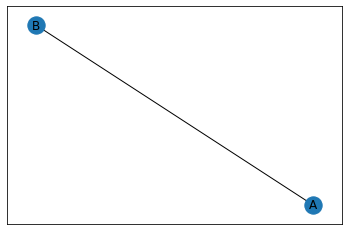

In [3]:
G = nx.Graph()
G.add_edge('A', 'B')

# G.pos = nx.spring_layout(G)

nx.draw_networkx(G)

/tmp/ipykernel_1253853/4012028106.py:9: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])


{('A', 'B'): Text(0.07022571478609471, 0.4707637722456877, '9th Avenue'),
 ('B', 'C'): Text(-0.07458702674044534, -0.4999999999999999, '10th Avenue')}

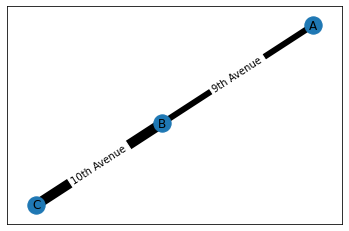

In [34]:
G = nx.Graph()
G.add_edge('A', 'B', weight=6, relation='9th Avenue')
G.add_edge('B', 'C', weight=10, relation='10th Avenue')

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])

labels = nx.get_edge_attributes(G,'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [35]:
net = Network('700px', '700px', notebook=True)

In [36]:
edges_length = {(a, b): w/10 for a, b, w in G.edges(data='weight')}
edges_length

{('A', 'B'): 0.6, ('B', 'C'): 1.0}

/home/ismail/anaconda3/lib/python3.9/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


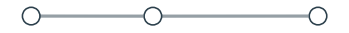

In [37]:
net.from_nx(G)
fig, ax = plt.subplots()

Graph(list(edges_length.keys()), node_layout='geometric', node_layout_kwargs=dict(edge_length=edges_length), ax=ax)
ax.set_aspect('equal')
plt.show()